## Strength of a party
Strength of a party lies in converting voters into votes.  
To understand it, computed numbers votes for which a party contested and how much they gained.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline
plt.style.use('ggplot')

In [2]:
indata = pd.read_csv("Data/Tamil Nadu.csv")

In [3]:
indata.head()

,cid,cname,O.S.N.,Candidate,Party,EVM Votes,Postal Votes,Total Votes,PctVotes
0,1,Gummidipoondi,1,GOVINDARAJAN T.J,Dravida Munnetra Kazhagam,125001,1451,126452,56.94
1,1,Gummidipoondi,2,DILLIY K.M,Desiya Murpokku Dravida Kazhagam,2553,23,2576,1.16
2,1,Gummidipoondi,3,NAGARAJ S,Bahujan Samaj Party,1031,7,1038,0.47
3,1,Gummidipoondi,4,USHA,Naam Tamilar Katchi,11643,58,11701,5.27
4,1,Gummidipoondi,5,GOWTHAM J,Anaithu Makkal Arasiyal Katchi,254,0,254,0.11


In [4]:
consta_votes = indata.groupby(['cname']).agg(votes = ('Total Votes', 'sum'))
consta_votes.reset_index(inplace=True)

In [5]:
party_votes = indata.loc[indata['Party'] != 'Independent'].groupby(['Party']).agg(TotalVotes=('Total Votes', 'sum'))
party_votes.sort_values(['TotalVotes', 'Party'], ascending=False, inplace=True)
party_votes.reset_index(inplace=True)
party_votes['CompetedVotes'] = 0
party_votes['CompetedConsta'] = 0

In [6]:
for idx, row in party_votes.iterrows():
    contested = indata.loc[indata['Party'] == row['Party']]['cname'].unique()
    votes = consta_votes.loc[consta_votes['cname'].isin(contested)]['votes'].sum()
    party_votes.loc[idx, 'CompetedVotes'] = votes
    party_votes.loc[idx, 'CompetedConsta'] = len(contested)
party_votes['PctVotes'] = party_votes['TotalVotes'] / party_votes['CompetedVotes']
party_votes.sort_values(['PctVotes'], ascending=False, inplace=True)
party_votes.head(12)

,Party,TotalVotes,CompetedVotes,CompetedConsta,PctVotes
0,Dravida Munnetra Kazhagam,17430100,37523212,188,0.464515
8,Communist Party of India,504537,1165783,6,0.432788
9,Viduthalai Chiruthaigal Katchi,457763,1078590,6,0.424409
3,Indian National Congress,1976527,4779109,25,0.413576
1,All India Anna Dravida Munnetra Kazhagam,15390974,38017733,191,0.404837
12,Indian Union Muslim League,222263,578723,3,0.384058
4,Pattali Makkal Katchi,1758774,4676247,23,0.376108
10,Communist Party of India (Marxist),390819,1111075,6,0.351749
5,Bharatiya Janata Party,1213510,3542512,20,0.342556
2,Naam Tamilar Katchi,3041974,46236492,234,0.065792


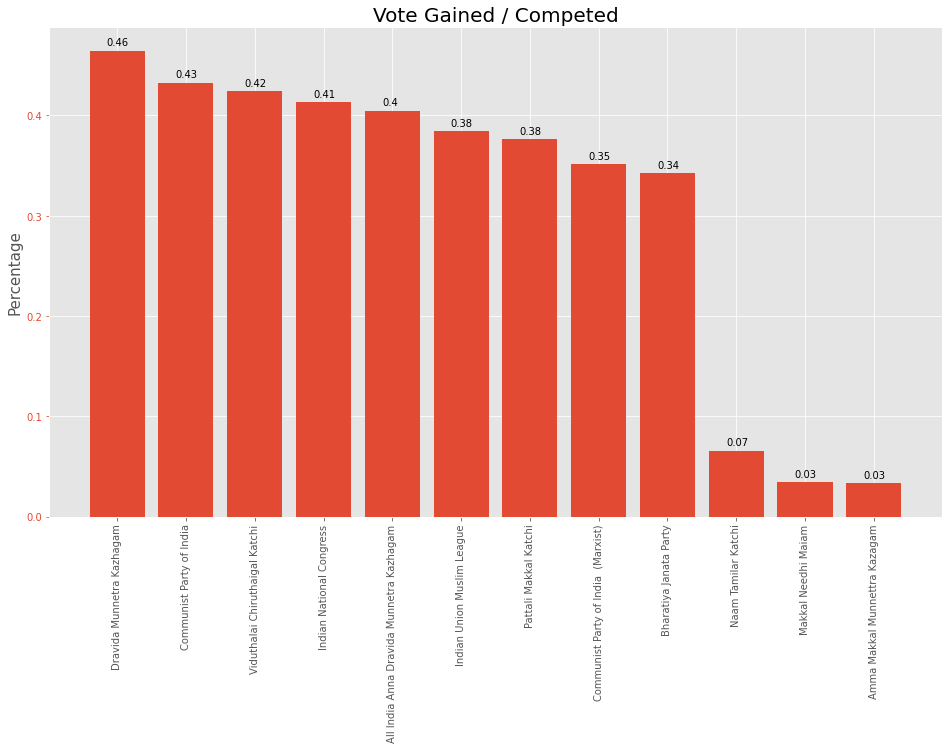

In [7]:
plot_data = party_votes.iloc[:12]
fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(plot_data['Party'], plot_data['PctVotes'], color="C0")


ax.tick_params(axis="y", colors="C0")
ax.set_ylabel('Percentage', fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax.tick_params(axis="x", labelrotation=90)
ax.set_title("Vote Gained / Competed", 
             fontdict={'fontsize': 20, 'fontweight': 'medium'})

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + 0.25, p.get_height() + 0.005))
    
plt.show()

## Observations

- These are the top 12 parties in TN out of the 108 parties competed in this election excluding the independent candidates.
- **Dravida Munnetra Kazhagam** DMK is really strong, they competed in 188 Constituency and gained 46% of votes from there
- **Communist Party of India, Viduthalai Chiruthaigal Katchi** gained 40+% of votes, we cannot call them really strong because they competed in very few constituency. It doesn't mean if they compete in 100+ constituency they will win similar score. Their strength lies in picking the constituency where they are likely to win
- **Indian National Congress**, have scope for improvement, They competed in 25 place and won 40+% votes, they could compete in few more place and win similar score
- **Naam Tamilar Katchi, Makkal Needhi Maiam & Amma Makkal Munnettra Kazagam** competed in 234, 180 & 165 constituency respectively. Even though they have lot of votes but the win rate is extremely low. It shows there presence is not felt in any part of Tamil Nadu. Long way for them to go.
    - Probably they should gain confidence from few constituency and then focus on rest of the Tamil Nadu

### Comepted vs Won

In [8]:
win_count = indata.sort_values('Total Votes', ascending=False).drop_duplicates(['cname'])['Party'].value_counts()
win_count = win_count.reset_index()
win_count.rename({'index':'Party', 'Party':'Won'}, axis='columns', inplace=True)

In [9]:
party_votes_won = party_votes.merge(win_count, how='left', on='Party')
party_votes_won.dropna(subset=['Won'], inplace=True)
party_votes_won['WonRatio'] = party_votes_won['Won'] / party_votes_won['CompetedConsta']
party_votes_won.sort_values(['WonRatio', 'TotalVotes'], ascending=False)

,Party,TotalVotes,CompetedVotes,CompetedConsta,PctVotes,Won,WonRatio
3,Indian National Congress,1976527,4779109,25,0.413576,18.0,0.720000
0,Dravida Munnetra Kazhagam,17430100,37523212,188,0.464515,133.0,0.707447
2,Viduthalai Chiruthaigal Katchi,457763,1078590,6,0.424409,4.0,0.666667
4,All India Anna Dravida Munnetra Kazhagam,15390974,38017733,191,0.404837,66.0,0.345550
1,Communist Party of India,504537,1165783,6,0.432788,2.0,0.333333
7,Communist Party of India (Marxist),390819,1111075,6,0.351749,2.0,0.333333
6,Pattali Makkal Katchi,1758774,4676247,23,0.376108,5.0,0.217391
8,Bharatiya Janata Party,1213510,3542512,20,0.342556,4.0,0.200000
